In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image
from tensorflow.keras.callbacks import CSVLogger
import matplotlib.pyplot as plt

In [3]:
data = []
labels = []
classs = ['with out mask','mask']


In [4]:
def load_images_from_folder(folder_path, label):
  for filename in os.listdir(folder_path):
    img = Image.open(os.path.join(folder_path, filename)).convert('RGB')
    img = img.resize((128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data.append(img)
    labels.append(label)

load_images_from_folder('/content/data/with_mask', 1)
load_images_from_folder('/content/data/without_mask', 0)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
x=np.array(data)
y = np.array(labels)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
len(data)

7553

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [34]:
#model section
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
csv_logger = CSVLogger('log.csv')
history = model.fit(X_train, y_train, epochs=3, batch_size=32, callbacks=[csv_logger])

Epoch 1/3
189/189 ━━━━━━━━━━━━━━━━━━━━ 136s 718ms/step - accuracy: 0.8113 - loss: 0.4108
Epoch 2/3
189/189 ━━━━━━━━━━━━━━━━━━━━ 138s 698ms/step - accuracy: 0.9080 - loss: 0.2411
Epoch 3/3
189/189 ━━━━━━━━━━━━━━━━━━━━ 135s 716ms/step - accuracy: 0.9280 - loss: 0.1944


In [13]:
loss,accuracy = model.evaluate(X_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.9073 - loss: 0.2310


In [17]:
preditction = model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step


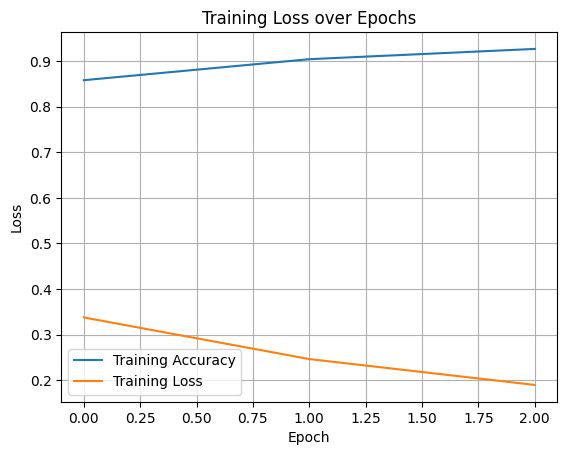

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
model.save("cnn_model.h5")

In [29]:
import tensorflow as tf
model_1 = tf.keras.models.load_model('/content/cnn_model.h5')

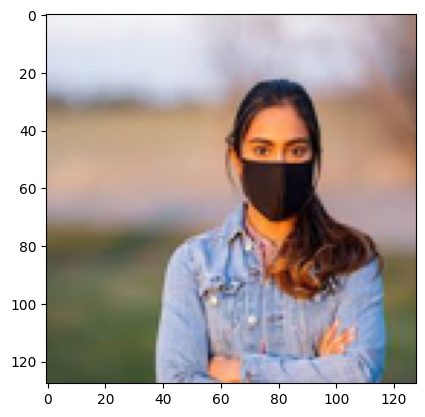

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
with mask


In [42]:
def predict_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.0
    img = np.expand_dims(img,axis=0)
    return img

processed_image = predict_image('/content/test_1.jpeg')
processed_image_1 = np.squeeze(processed_image)
plt.imshow(processed_image_1)
plt.show()

predicted_image = model_1.predict(processed_image)
if(predicted_image>0.5):
  print("with mask")
else:
  print("without mask")